**Import Library**

In [3]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk perhitungan numerik
from sklearn.model_selection import train_test_split  # Untuk membagi data
from sklearn.preprocessing import StandardScaler  # Untuk normalisasi data
from sklearn.ensemble import RandomForestClassifier  # Untuk model klasifikasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Untuk evaluasi model
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi lebih lanjut
import joblib  # Untuk menyimpan model

# Membaca data dari file yang diunggah
file_path = '/content/drive/MyDrive/AI/Neuro/AI for Optimizing Artificial Blood Vessel Selection/artificial_blood_vessel_dataset.xlsx'
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama untuk memeriksa struktur data
df.head()


,Patient_ID,Age,Gender,Vessel_Type,Diameter_mm,Length_mm,Elasticity_Index,Blood_Pressure_mmHg,Occlusion_Percentage,Previous_Surgery_History,Tissue_Compatibility_Score,Selected_for_Artificial_Vessel
0,P1000,69,Female,Artery,5.54,175,1.85,106,32.3,No,98.98,1
1,P1001,32,Female,Artery,6.29,179,1.97,177,22.9,Yes,58.77,1
2,P1002,89,Female,Capillary,7.41,102,0.92,100,26.6,No,50.86,0
3,P1003,78,Female,Capillary,2.68,221,1.58,109,29.0,Yes,88.17,0
4,P1004,38,Female,Capillary,6.64,267,1.89,176,76.4,No,90.35,1


**Pembersihan dan Pra-pemrosesan Data**

In [4]:
# Mengonversi kolom kategorikal menjadi numerik
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})
df['Vessel_Type'] = df['Vessel_Type'].map({'Artery': 0, 'Vein': 1, 'Capillary': 2})
df['Previous_Surgery_History'] = df['Previous_Surgery_History'].map({'Yes': 1, 'No': 0})

# Menghapus kolom 'Patient_ID' karena tidak relevan untuk analisis
df = df.drop(columns=['Patient_ID'])

# Memeriksa apakah ada nilai yang hilang
df.isnull().sum()

# Jika ada nilai yang hilang, kita bisa menggantinya dengan nilai rata-rata
df.fillna(df.mean(), inplace=True)

# Menampilkan beberapa baris setelah pemrosesan
df.head()


,Age,Gender,Vessel_Type,Diameter_mm,Length_mm,Elasticity_Index,Blood_Pressure_mmHg,Occlusion_Percentage,Previous_Surgery_History,Tissue_Compatibility_Score,Selected_for_Artificial_Vessel
0,69,1,0,5.54,175,1.85,106,32.3,0,98.98,1
1,32,1,0,6.29,179,1.97,177,22.9,1,58.77,1
2,89,1,2,7.41,102,0.92,100,26.6,0,50.86,0
3,78,1,2,2.68,221,1.58,109,29.0,1,88.17,0
4,38,1,2,6.64,267,1.89,176,76.4,0,90.35,1


**Memisahkan Fitur (X) dan Target (y)**

In [5]:
# Menentukan fitur (X) dan target (y)
X = df.drop(columns=['Selected_for_Artificial_Vessel'])  # Semua kolom kecuali target
y = df['Selected_for_Artificial_Vessel']  # Kolom target yang ingin diprediksi


**Membagi Data Menjadi Data Pelatihan dan Pengujian**

In [6]:
# Membagi data menjadi data pelatihan dan data pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi data (fitur berada dalam skala yang sama)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Normalisasi data pelatihan
X_test = scaler.transform(X_test)  # Normalisasi data pengujian


**Training**

In [7]:
# Membuat model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Evaluasi Model**

Akurasi Model: 0.60
              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.50      0.25      0.33         4

    accuracy                           0.60        10
   macro avg       0.56      0.54      0.52        10
weighted avg       0.57      0.60      0.56        10



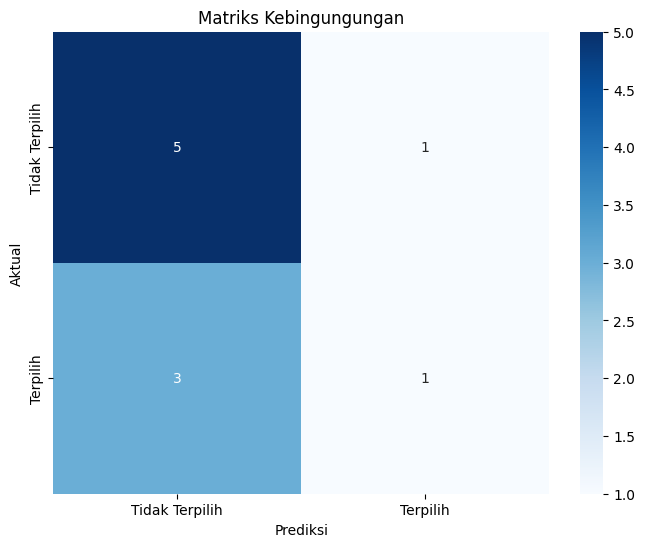

In [8]:
# Membuat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.2f}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))

# Matriks kebingungungan
cm = confusion_matrix(y_test, y_pred)

# Visualisasi matriks kebingungungan
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Terpilih', 'Terpilih'], yticklabels=['Tidak Terpilih', 'Terpilih'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Matriks Kebingungungan')
plt.show()


**Menyimpan Model untuk Penggunaan di Masa Depan**

In [9]:
# Menyimpan model yang sudah dilatih ke dalam file
joblib.dump(model, '/content/drive/MyDrive/AI/Neuro/AI for Optimizing Artificial Blood Vessel Selection/save/artificial_blood_vessel_model.pkl')

# Memuat model yang sudah disimpan untuk penggunaan selanjutnya
loaded_model = joblib.load('/content/drive/MyDrive/AI/Neuro/AI for Optimizing Artificial Blood Vessel Selection/save/artificial_blood_vessel_model.pkl')


**Prediksi dengan Data Baru**

In [10]:
# Contoh data pasien baru (misalnya, seorang pasien baru)
# Misalkan data baru memiliki fitur seperti ini: [Umur, Gender, Jenis Pembuluh Darah, Diameter, Panjang, Indeks Elastisitas, Tekanan Darah, Persentase Penyumbatan, Riwayat Operasi, Skor Kompatibilitas]
new_data = np.array([[69, 1, 0, 5.54, 175, 1.85, 106, 32.3, 0, 98.98]])  # Data baru pasien

# Normalisasi data baru menggunakan scaler yang sama
new_data = scaler.transform(new_data)

# Melakukan prediksi apakah pembuluh darah tersebut terpilih atau tidak
prediction = loaded_model.predict(new_data)
print(f'Prediksi: {"Terpilih" if prediction[0] == 1 else "Tidak Terpilih"}')



Prediksi: Terpilih


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
